In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df=pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [25]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [26]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [27]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [28]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [29]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

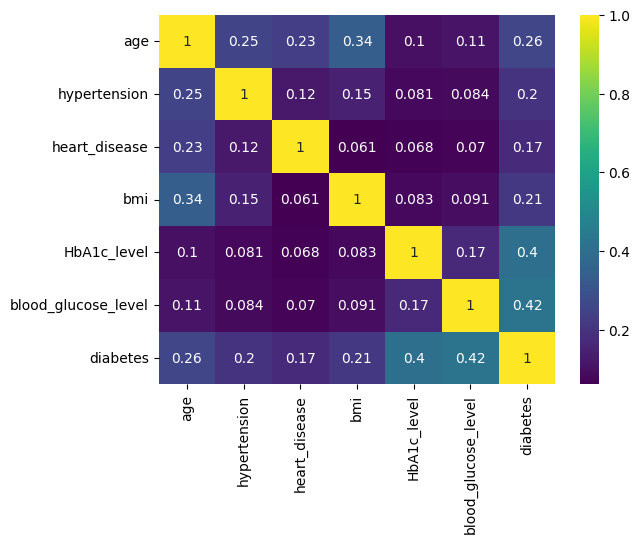

In [30]:
sns.heatmap(df.corr(numeric_only=True),cmap='viridis',annot=True)

<Axes: xlabel='diabetes', ylabel='count'>

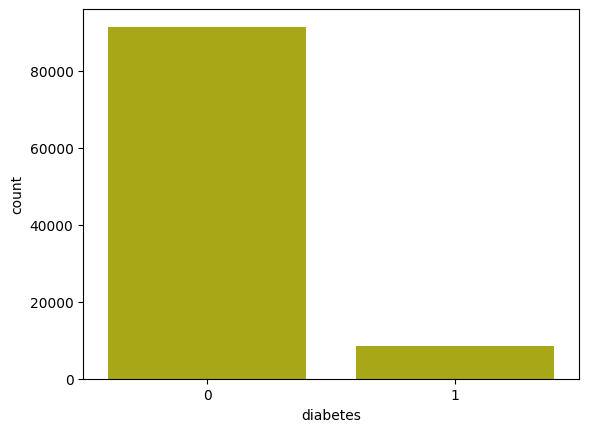

In [31]:
sns.countplot(x='diabetes',data=df,color='y')

<ipython-input-32-13deed28ac5a>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:m'` for the same effect.

  sns.countplot(x='diabetes',data=df,hue='heart_disease',color='m')


<Axes: xlabel='diabetes', ylabel='count'>

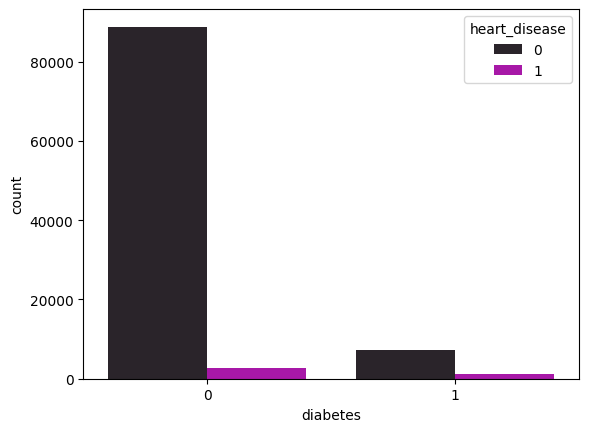

In [32]:
sns.countplot(x='diabetes',data=df,hue='heart_disease',color='m')

In [33]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [34]:
df.drop(['gender'],axis=1,inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['smoking_history']=label.fit_transform(df['smoking_history'])
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4,25.19,6.6,140,0
1,54.0,0,0,0,27.32,6.6,80,0
2,28.0,0,0,4,27.32,5.7,158,0
3,36.0,0,0,1,23.45,5.0,155,0
4,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0,27.32,6.2,90,0
99996,2.0,0,0,0,17.37,6.5,100,0
99997,66.0,0,0,3,27.83,5.7,155,0
99998,24.0,0,0,4,35.42,4.0,100,0


In [36]:
x=df.iloc[:,:-1].values
x

array([[ 80.  ,   0.  ,   1.  , ...,  25.19,   6.6 , 140.  ],
       [ 54.  ,   0.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [ 28.  ,   0.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [ 66.  ,   0.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [ 24.  ,   0.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [ 57.  ,   0.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [37]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

knn=KNeighborsClassifier(n_neighbors=7)
tree=DecisionTreeClassifier(criterion='entropy')
ab=AdaBoostClassifier(n_estimators=50,random_state=42)

lst=[knn,tree,ab]


In [43]:
for i in lst:
  print('Model: ',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
  print('Accuracy Score: \n',accuracy_score(y_test,y_pred))
  print('Classification Report: \n',classification_report(y_test,y_pred))
  print('*'*50)

Model:  KNeighborsClassifier(n_neighbors=7)
Confusion Matrix: 
 [[27318   135]
 [ 1287  1260]]
Accuracy Score: 
 0.9526
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.97     27453
           1       0.90      0.49      0.64      2547

    accuracy                           0.95     30000
   macro avg       0.93      0.74      0.81     30000
weighted avg       0.95      0.95      0.95     30000

**************************************************
Model:  DecisionTreeClassifier(criterion='entropy')
Confusion Matrix: 
 [[26776   677]
 [  696  1851]]
Accuracy Score: 
 0.9542333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     27453
           1       0.73      0.73      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0